In [2]:
import pandas as pd
import seaborn as sns
from plotnine import *
from matplotlib import gridspec
from intedact import univariate_eda_interact
from intedact import continuous_univariate_summary, discrete_univariate_summary
from intedact import histogram, boxplot, countplot
theme_set(theme_xkcd())

In [2]:
data_tips = sns.load_dataset('tips') 

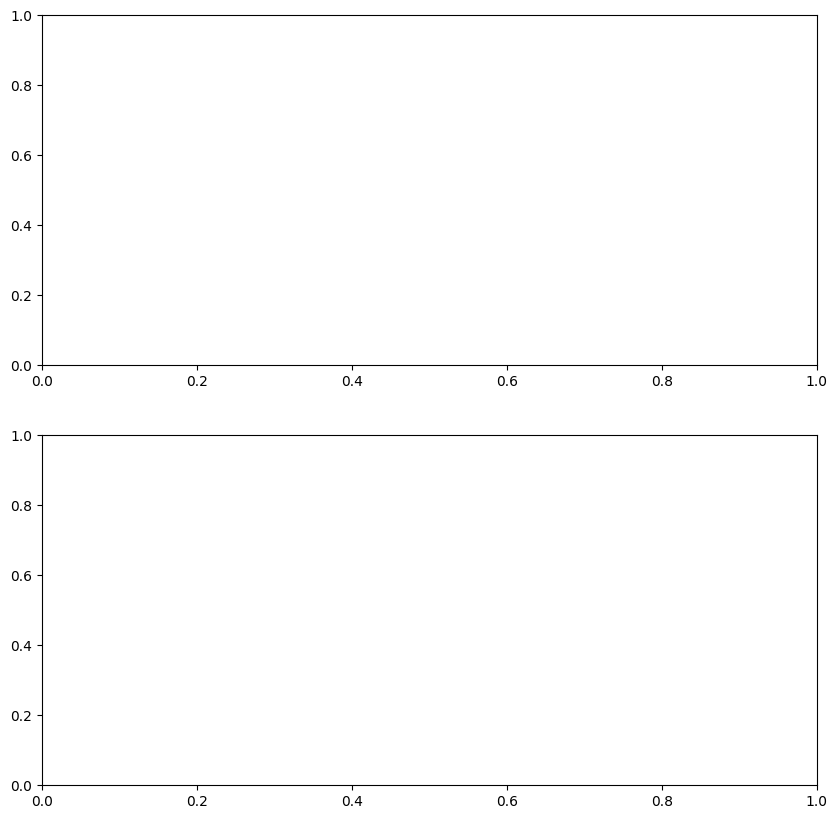

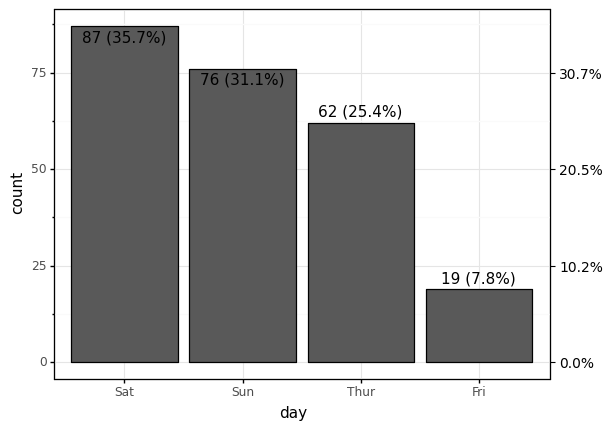

In [12]:
# make histogram and boxplot figure (empty figure hack for plotnine plotting with subplots)
# https://github.com/has2k1/plotnine/issues/373
fig = (ggplot() + geom_blank(data=pd.DataFrame()) + theme_void()).draw();
fig.set_size_inches(10, 5 * 2)
gs = gridspec.GridSpec(2, 1)
ax_hist = fig.add_subplot(gs[0])
ax_box = fig.add_subplot(gs[1])
#f2 = plot_histogram(data_tips, 'total_bill',  upper_quantile=.95, transform='sqrt')
f2 = countplot(data_tips, 'day', theme='theme_bw');

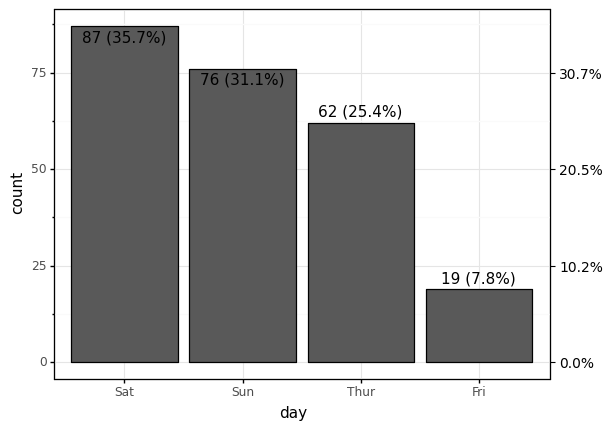

In [13]:
f2[0]

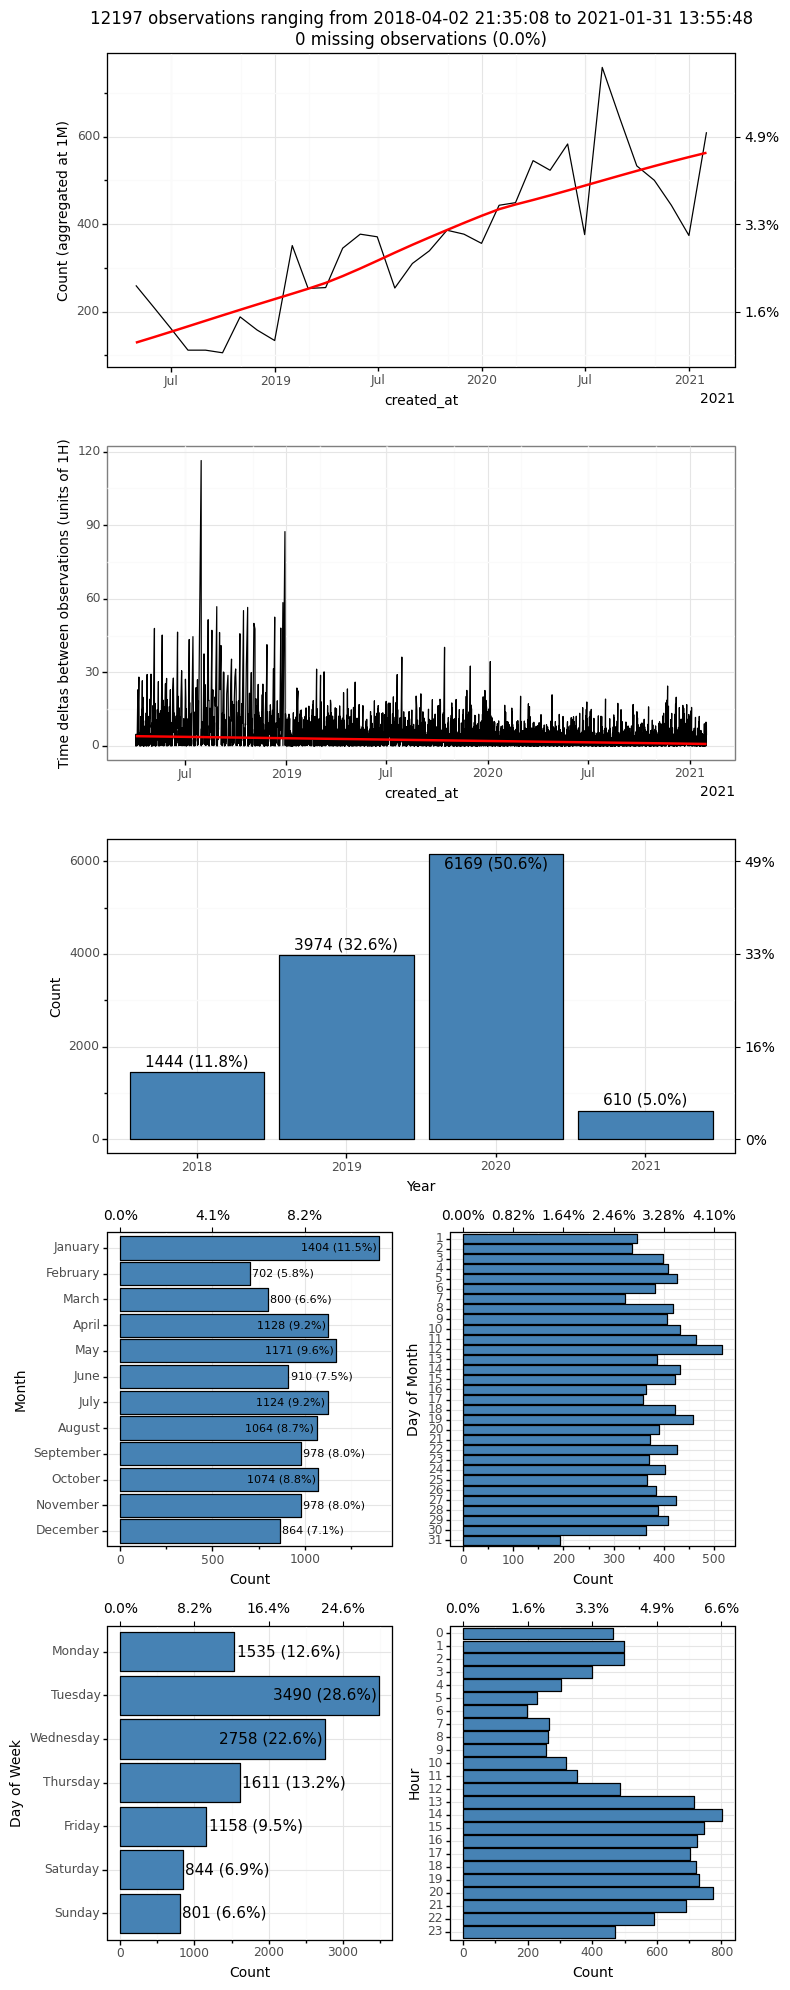

In [1]:
import pandas as pd
import intedact
data = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/tidytuesday_tweets/data.csv")
data['created_at'] = pd.to_datetime(data.created_at)
#intedact.time_series_countplot(data, 'created_at', ts_freq='1MS', trend_line='auto');
intedact.datetime_univariate_summary(data, 'created_at', delta_freq='1H', ts_type='line')

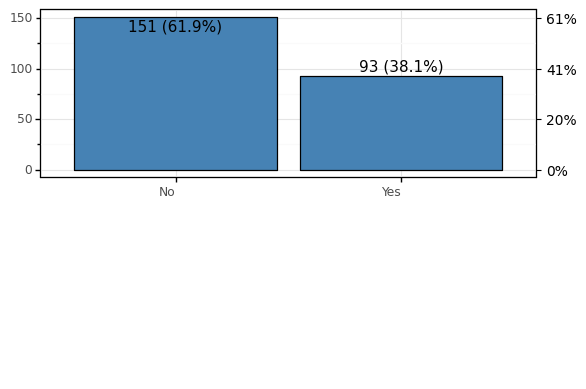

In [6]:
import matplotlib.pyplot as plt
# make histogram and boxplot figure (empty figure hack for plotnine plotting with subplots)
# https://github.com/has2k1/plotnine/issues/373
fig = (ggplot() + geom_blank(data=pd.DataFrame()) + theme_void()).draw();
gs = gridspec.GridSpec(2, 1)
ax = fig.add_subplot(gs[0])
plot_countplot(data_tips, 'smoker', fig, ax);

,count,mean,std,min,25%,50%,75%,max,iqr,missing_count,missing_percent
total_bill,231.0,18.447186,6.999459,3.07,13.145,17.29,22.755,38.01,9.61,0,0.0


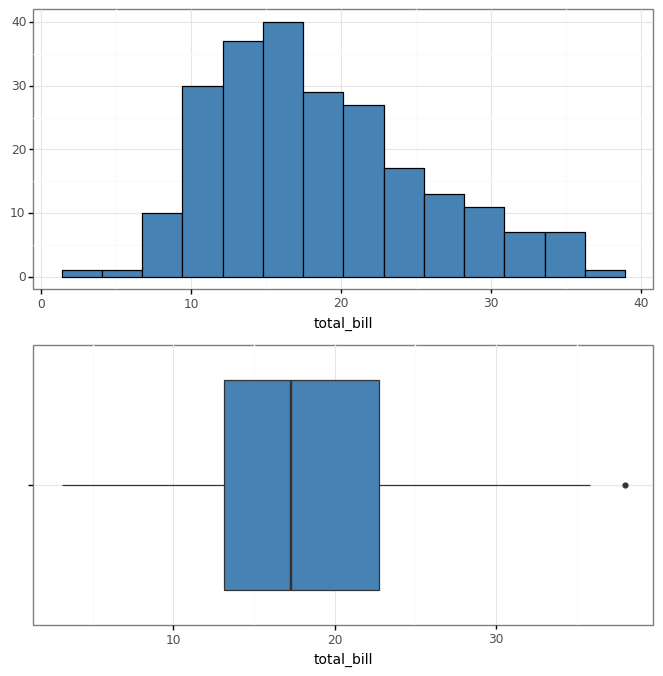

In [3]:
continuous_univariate_eda(data_tips, 'total_bill', interactive=True, upper_quantile=.95);

In [5]:
data_tips = sns.load_dataset('tips') 
data_tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


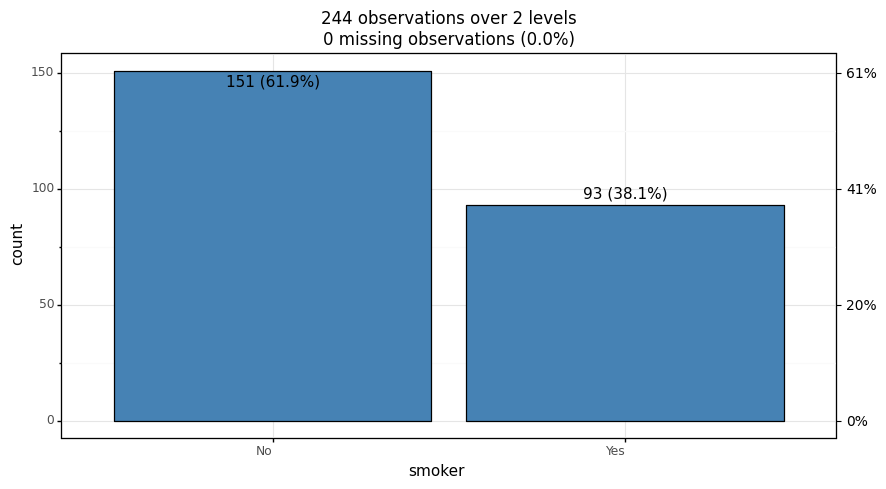

In [5]:
fig = discrete_univariate_eda(data_tips, 'smoker')

In [7]:
fig.show()

<ipython-input-7-6ebedab27258>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [3]:
univariate_eda_interact(data_tips)

NameError: name 'data_tips' is not defined

In [4]:
bivariate_eda_interact(data_tips);

interactive(children=(Dropdown(description='column1: Column to be plotted as independent variable', options=('…

# Example 2: GDPR Violations

Our second example is a more involved dataset containing GDPR violations that was collected and shared as part of Tidy Tuesday.

Be sure to check out unique functionality for the following columns:
  - name: flipping orientation to allow readability of higher dim categorical variables
  - price: log transformations to allow better visualization of skewed data 
  - summary: univariate eda for a text column 
  - article_violated: univariate eda for a list column 

In [4]:
data_gdpr = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-21/gdpr_violations.tsv", 
    sep='\t')

# convert everything to proper type
data_gdpr = data_gdpr.astype({
    'date': 'datetime64[ns]',
    'name': 'category',
    'summary': 'string',
    'controller': 'category',
    'article_violated': 'string',
    'source': 'category',
    'authority': 'category',
    'picture': 'category',
    'type': 'category'
});

# make a list column rather than str
data_gdpr['article_violated'] = data_gdpr['article_violated'].apply(lambda x: x.split('|'))
data_gdpr.head(5)

,id,picture,name,price,authority,date,controller,article_violated,type,source,summary
0,1,https://www.privacyaffairs.com/wp-content/uplo...,Poland,9380,Polish National Personal Data Protection Offic...,2019-10-18,Polish Mayor,[Art. 28 GDPR],Non-compliance with lawful basis for data proc...,https://uodo.gov.pl/decyzje/ZSPU.421.3.2019,No data processing agreement has been conclude...
1,2,https://www.privacyaffairs.com/wp-content/uplo...,Romania,2500,Romanian National Supervisory Authority for Pe...,2019-10-17,UTTIS INDUSTRIES,"[Art. 12 GDPR, Art. 13 GDPR, Art. 5 (1) c) GDP...",Information obligation non-compliance,https://www.dataprotection.ro/?page=A_patra_am...,A controller was sanctioned because he had unl...
2,3,https://www.privacyaffairs.com/wp-content/uplo...,Spain,60000,Spanish Data Protection Authority (AEPD),2019-10-16,Xfera Moviles S.A.,"[Art. 5 GDPR, Art. 6 GDPR]",Non-compliance with lawful basis for data proc...,https://www.aepd.es/resoluciones/PS-00262-2019...,The company had unlawfully processed the perso...
3,4,https://www.privacyaffairs.com/wp-content/uplo...,Spain,8000,Spanish Data Protection Authority (AEPD),2019-10-16,Iberdrola Clientes,[Art. 31 GDPR],Failure to cooperate with supervisory authority,https://www.aepd.es/resoluciones/PS-00304-2019...,Iberdrola Clientes violated Article 13 of the ...
4,5,https://www.privacyaffairs.com/wp-content/uplo...,Romania,150000,Romanian National Supervisory Authority for Pe...,2019-10-09,Raiffeisen Bank SA,[Art. 32 GDPR],Failure to implement sufficient measures to en...,https://www.dataprotection.ro/?page=Comunicat_...,Raiffeisen Bank Romania did not observe the ne...


In [5]:
univariate_eda_interact(data_gdpr)

interactive(children=(Dropdown(description='column: Column to be plotted', options=('id', 'picture', 'name', '…

In [6]:
bivariate_eda_interact(data_gdpr)

interactive(children=(Dropdown(description='column1: Column to be plotted as independent variable', options=('…

interactive(children=(Dropdown(description='column1: Column to be plotted as independent variable', options=('…

In [4]:
import pandas as pd
import intedact
data = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-09-11/cats_vs_dogs.csv")
import seaborn as sns
data = sns.load_dataset('diamonds')
#data['created_at'] = pd.to_datetime(data['created_at'])

In [5]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [10]:
import matplotlib.pyplot as plt
fig.savefig('tmp.png')

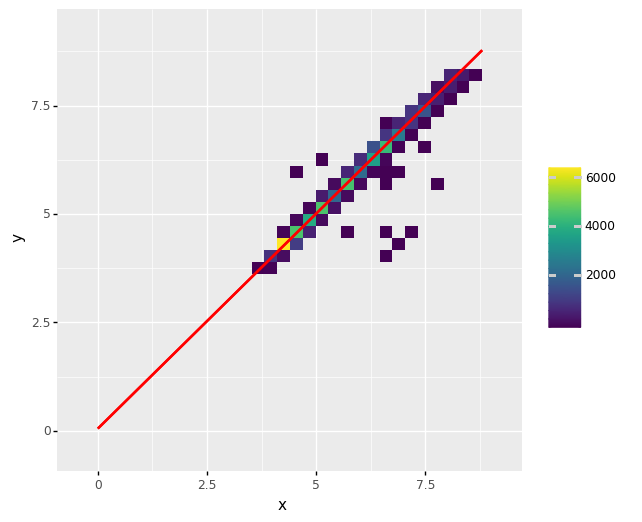

In [9]:
fig, ax, gg = intedact.histogram2d(data, 'x', 'y', equalize_axes=True, upper_quantile2=.99);

In [5]:
intedact.bivariate_eda_interact(data)

interactive(children=(Dropdown(description='column1: Column to be plotted as independent variable', options=('…

# Example 3: Trump Tweets

In [1]:
from intedact import time_series_countplot
import pandas as pd

In [2]:
data_trump = pd.read_csv('data/raw/trump_tweets.csv')
data_trump = data_trump.astype({
    'date': 'datetime64[ns]',
    'content': 'string',
    'mentions': 'string',
    'hashtags': 'string'
});
data_trump['mentions'] = data_trump['mentions'].apply(lambda x: x.split(',') if not pd.isnull(x) else x)
data_trump['hashtags'] = data_trump['hashtags'].apply(lambda x: x.split(',') if not pd.isnull(x) else x)
data_trump.head(5)

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,<NA>,<NA>
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,<NA>,<NA>
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,<NA>,<NA>
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,<NA>,<NA>
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,<NA>,<NA>


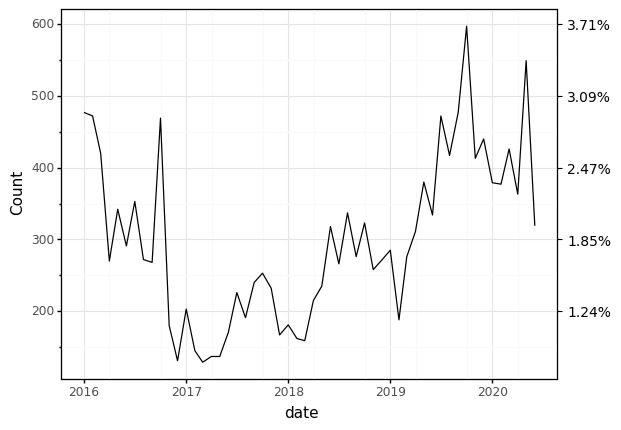

In [7]:
tmp = data_trump[data_trump.date >= '2016-01-01']
time_series_countplot(tmp, 'date', ts_freq = "1 months")[0];

In [45]:
tmp = data_trump \
    .query('date >= "2018-06-01"') \
    .set_index('date') \
    .resample('1M') \
    .agg('size')
tmp2 = tmp.reset_index().rename({0: 'Count'}, axis='columns')

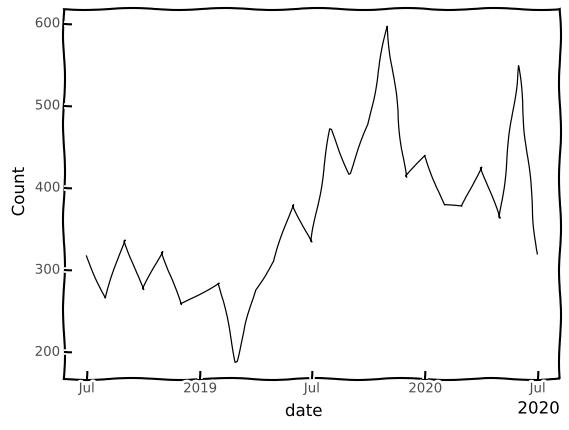

In [46]:
import matplotlib.dates as mdates
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
from plotnine import *
fig = (ggplot(data=tmp2, mapping=aes(x='date', y='Count')) + geom_line() + scale_x_datetime()).draw()
ax = fig.axes[0]
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

<AxesSubplot:xlabel='date'>

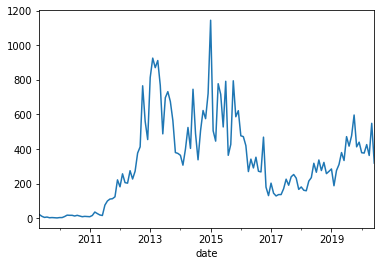

In [32]:
tmp.plot()

In [7]:
univariate_eda_interact(data_trump)

interactive(children=(Dropdown(description='column: Column to be plotted', options=('id', 'link', 'content', '…